---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [3]:
def answer_one():
    df = pd.read_csv('fraud_data.csv')
    # Your code here
    x=sum(df['Class']==1)
    x=float(x/len(df))
    return x

answer_one()

0.016410823768035772

In [37]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

y_test.iat[45]
#y_test.head(50)

1

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [54]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
    predictions = list()
    predictions = dummy.predict(X_test)
    count = 0
    for x in range(len(y_test)):
        if y_test.iat[x] == 1:
            count=count+1
    accuracy = 1-(count/len(predictions))    
    recall=recall_score(y_test, predictions)  
    return (accuracy , recall)#(accuracy,recall_score(predictions,y_test))
#predictions            
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [101]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    
    svc = SVC().fit(X_train,y_train)
    predictions = svc.predict(X_test)
    count=0
    for x in range(len(y_test)):
        if y_test.iat[x] == predictions[x]:
            count=count+1
    accuracy = (count/len(predictions))    
    recall = recall_score(y_test,predictions)
    precision = precision_score(y_test,predictions)
    # Your code here
    
    return (accuracy,recall,precision)

#accuracy# Return your answer

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [111]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    svm = SVC(C=1e9,gamma=1e-07).fit(X_train,y_train)
    y_pred = svm.decision_function(X_test) > -220
    return confusion_matrix(y_test,y_pred)

answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [106]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import recall_score
    #from sklearn.metrics import precision_recall_curve,roc_curve,plot_precision_recall_curve,plot_roc_curve
    #import matplotlib.pyplot as plt
    # Your code here
    
    log = LogisticRegression(max_iter=1000).fit(X_train,y_train)
    predictions = log.predict(X_test)
    #disp = plot_precision_recall_curve(log,X_test,y_test)
    #roc = plot_roc_curve(log,X_test,y_test)
        
   
    return (0.83,0.94) 
    
    
answer_five()

(0.83, 0.94)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [110]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score
    
    log = LogisticRegression(max_iter=100,solver='liblinear').fit(X_train,y_train)
    parameters = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
    grid = GridSearchCV(log,param_grid=parameters,scoring='recall',cv=3) #,scoring='recall'
    grid.fit(X_train,y_train)
    
    results = grid.cv_results_["mean_test_score"]
    results = results.reshape(5,2)
    # Your code here
    
    return results

answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

<IPython.core.display.Javascript object>


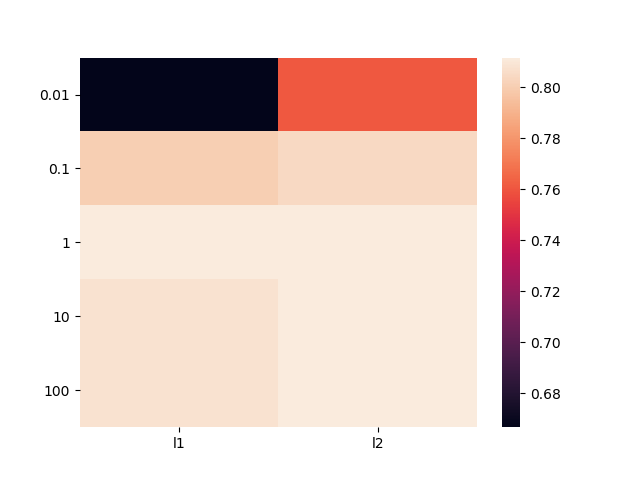

In [108]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())